In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu15 = pd.read_csv('AHU_15.csv',low_memory=False)
ahu15 = ahu15.ffill()
ahu15.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,31-12-2015,00:00:00,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
1,31-12-2015,00:09:03,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
2,31-12-2015,00:09:15,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
3,31-12-2015,00:09:35,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
4,31-12-2015,00:10:04,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0


In [3]:
ahu15.rename(columns={'Column1':'Date','Column2':'Time','Column3':'Cooling coil valve %open','Column5':'exhaust fans ON?OFF',
                      'Column6':'Mixed air damper % open','Column7':'Mixed air temperature','Column8':'Pre-heat coil discharger temperature',
                      'Column9':'Pre-heat coil discharger valve','Column10':'re-heat coil 1 Discharger temperature','Column11':'re-heat coil 1 Discharger Valve',
                      'Column12':'re-heat coil 2 Discharger temperature','Column13':'re-heat coil 2 Discharger Valve','Column4':'Discharger temperature',
                      'Column14':'Return air temperature','Column15':'Supply fan VFD status', 'Column16':'Supply fan VFD speed'},inplace = True)
ahu15.head()

,Date,Time,Cooling coil valve %open,Discharger temperature,exhaust fans ON?OFF,Mixed air damper % open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,re-heat coil 1 Discharger temperature,re-heat coil 1 Discharger Valve,re-heat coil 2 Discharger temperature,re-heat coil 2 Discharger Valve,Return air temperature,Supply fan VFD status,Supply fan VFD speed
0,31-12-2015,00:00:00,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
1,31-12-2015,00:09:03,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
2,31-12-2015,00:09:15,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
3,31-12-2015,00:09:35,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0
4,31-12-2015,00:10:04,1.9,73.9,ON,1.9,73.6,73.9,11.0,73.92,15.1,74.02,15.1,73.5,STOP,0


In [4]:
sup_on = ahu15[ahu15['Supply fan VFD status'].str.contains('RUN')]
sup_off = ahu15[ahu15['Supply fan VFD status'].str.contains('STOP')]
data_temp = [ahu15['Discharger temperature'],ahu15['Mixed air temperature'],ahu15['Pre-heat coil discharger temperature'],
             ahu15['re-heat coil 1 Discharger temperature'],ahu15['re-heat coil 2 Discharger temperature'],ahu15['Return air temperature']]
data_temp_1 =[sup_on['Discharger temperature'],sup_on['Mixed air temperature'],sup_on['Pre-heat coil discharger temperature'],
              sup_on['re-heat coil 1 Discharger temperature'],sup_on['re-heat coil 2 Discharger temperature'],sup_on['Return air temperature']]
data_temp_2 =[sup_off['Discharger temperature'],sup_off['Mixed air temperature'],sup_off['Pre-heat coil discharger temperature'],
              sup_off['re-heat coil 1 Discharger temperature'],sup_off['re-heat coil 2 Discharger temperature'],sup_off['Return air temperature']]

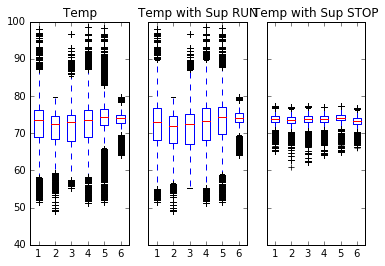

In [5]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp with Sup RUN')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp with Sup STOP')
#plt.show()
plt.savefig(''.join(['Temp','_test']))

In [6]:
data_value = [ahu15['Cooling coil valve %open'],ahu15['Mixed air damper % open'],ahu15['Pre-heat coil discharger valve'],
              ahu15['re-heat coil 1 Discharger Valve'],ahu15['re-heat coil 2 Discharger Valve']]
data_value_1 = [sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],sup_on['Pre-heat coil discharger valve'],
              sup_on['re-heat coil 1 Discharger Valve'],sup_on['re-heat coil 2 Discharger Valve']]
data_value_2 = [sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],sup_off['Pre-heat coil discharger valve'],
              sup_off['re-heat coil 1 Discharger Valve'],sup_off['re-heat coil 2 Discharger Valve']]
ahu15['Supply fan VFD speed'].unique()

array(['0', '1792', '1791', '1015', 'No Data'], dtype=object)

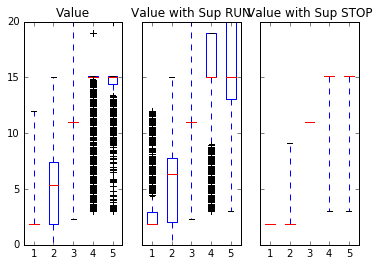

In [7]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value with Sup RUN')
ax3.boxplot(data_value_2)
ax3.set_title('Value with Sup STOP')
#plt.show()
plt.savefig(''.join(['Value','_ahu15']))

In [21]:
data_value = []
ahu15['Supply fan VFD speed'].unique()

array([0.0, 1792.0, 1791.0, 1015.0, '1791', '0', '1792', 'No Data'], dtype=object)

In [26]:
df1 = ahu15.copy()
df1 = df1.drop(['Date','Time','exhaust fans ON?OFF','Supply fan VFD status', 'Supply fan VFD speed'],1)
ahu15.columns.values

array(['Date', 'Time', 'Cooling coil valve %open',
       'Discharger temperature', 'exhaust fans ON?OFF',
       'Mixed air damper % open', 'Mixed air temperature',
       'Pre-heat coil discharger temperature',
       'Pre-heat coil discharger valve',
       're-heat coil 1 Discharger temperature',
       're-heat coil 1 Discharger Valve',
       're-heat coil 2 Discharger temperature',
       're-heat coil 2 Discharger Valve', 'Return air temperature',
       'Supply fan VFD status', 'Supply fan VFD speed'], dtype=object)

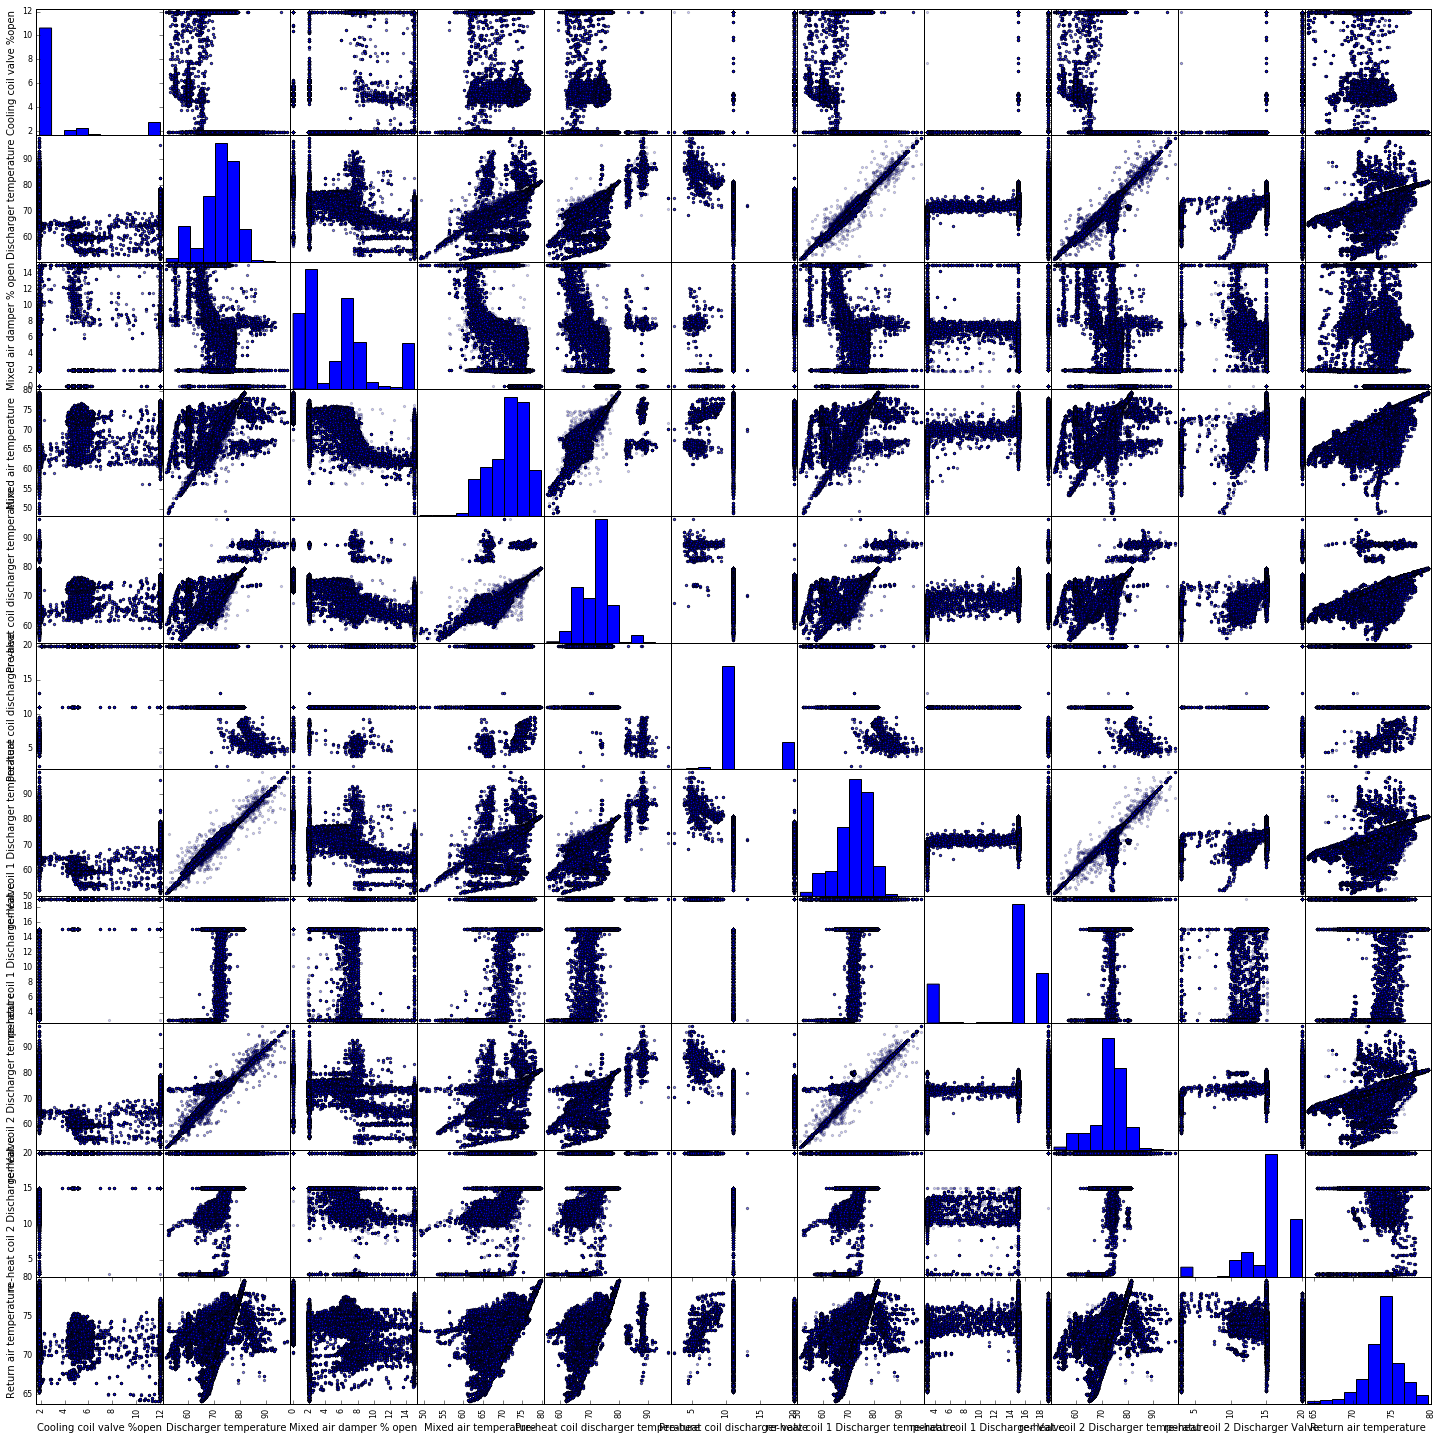

In [27]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_15']))

In [14]:
work = pd.read_excel('C:/Users/MisraSN-PC/Desktop/CSP 572 - Practicum/datasets/work order/keyword_it.xlsx',sheetname = '15TH')
work[work['Description'].str.contains('COLD')]

,Wo Number,Description,Assigned To,Building,Floor,Room,Craft,Enter Date,Wo Close Date,Hours SUM
